# Predicting Player Ratings

In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc. The dataset you are going to use is from European Soccer Database (https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016. Download the data in the same folder and run the following commmand to get it in the environment
About the Dataset The ultimate Soccer database for data analysis and machine learning The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch. +25,000 matches +10,000 players 11 European Countries with their lead championship Seasons 2008 to 2016 Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates Team line up with squad formation (X, Y coordinates) Betting odds from up to 10 providers Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.
Python skills required to complete this project SQL: The data is in SQL database so students need to retrive using query language. They also need to know how to connect SQL database woth python. The library we are using for this in 'sqlite3'. 1/19/2018 ML Project(Updated) (1) http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 2/4 SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You do not need to install this module separately because it is shipped by default along with Python version 2.5.x onwards. To use sqlite3 module, you must first create a connection object that represents the database and then optionally you can create a cursor object, which will help you in executing all the SQL statements. Pandas: Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python with Pandas is used in a wide range of fields including academic and commercial domains including finance, economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of Python Pandas and how to use them in practice. Scikit Learn Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes: NumPy: Base n-dimensional array package SciPy: Fundamental library for scientific computing Matplotlib: Comprehensive 2D/3D plotting IPython: Enhanced interactive console Sympy: Symbolic mathematics Pandas: Data structures and analysis Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn. The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as easy of use, code quality, collaboration, documentation and performance. Machine Learning skills required to complete the project Supervised learning Supervised learning deals with learning a function from available training data. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. 1/19/2018 ML Project(Updated) (1) http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 3/4 Regression Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables. It is parametric in nature because it makes certain assumptions (discussed next) based on the data set. If the data set follows those assumptions, regression gives incredible results. Model evaluation Student must know how to judge a model on unseen data. What metric to select to judge the performance

In [477]:
import sqlite3
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')


In [478]:
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [479]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [480]:
df.shape

(183978, 42)

In [481]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [482]:
np.unique(df.dtypes.values)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

## Display Simple statistics of data

In [483]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


## Clean the data


Real data is never clean. We need to make sure we clean the data by converting or getting rid of null or missing values.

In [484]:
df.select_dtypes(include =['float64','int64']).head().\
loc[:,df.select_dtypes(include =['float64','int64']).columns[3:]].head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


## Fixing the null values by deleting them

In [487]:
data = df.dropna()
data.isnull().sum()


id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


Check the null values and number of rows, we will see that there are no null values and number of rows decreased accordingly


In [488]:
data.shape

(180354, 42)

In [522]:
data.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day
id,1.000000,0.003744,0.002048,-0.003738,0.000837,-0.020231,-0.008171,-0.011781,-0.006701,-0.006916,...,-0.012515,-0.011101,0.014251,0.010911,0.008758,0.014015,0.014671,0.002740,0.003313,-0.000277
player_fifa_api_id,0.003744,1.000000,0.556557,-0.278703,-0.021252,-0.065631,-0.029836,-0.103500,-0.065311,-0.088726,...,-0.071128,-0.055218,-0.092945,-0.138844,-0.248222,-0.140925,-0.131531,0.237107,0.014365,-0.151573
player_api_id,0.002048,0.556557,1.000000,-0.328315,0.010588,-0.113365,-0.062312,-0.130282,-0.090237,-0.131262,...,-0.086706,-0.073595,-0.071825,-0.125345,-0.229704,-0.125525,-0.121947,0.249476,0.003358,-0.163907
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804,0.176181,0.051204,-0.053450
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936,-0.012256,0.009545,0.027973
crossing,-0.020231,-0.065631,-0.113365,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,...,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696,0.095220,0.018210,-0.037657
finishing,-0.008171,-0.029836,-0.062312,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,...,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302,0.067999,0.009245,-0.035689
heading_accuracy,-0.011781,-0.103500,-0.130282,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,...,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494,0.049192,0.013932,-0.017177
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260,0.136688,0.024745,-0.055080
volleys,-0.006916,-0.088726,-0.131262,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,...,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267,0.049499,0.005713,-0.025136


## Working with continuous data

In [523]:
corr2 = data.select_dtypes(include =['float64','int64']).\
loc[:,data.select_dtypes(include =['float64','int64']).columns[3:]].corr()

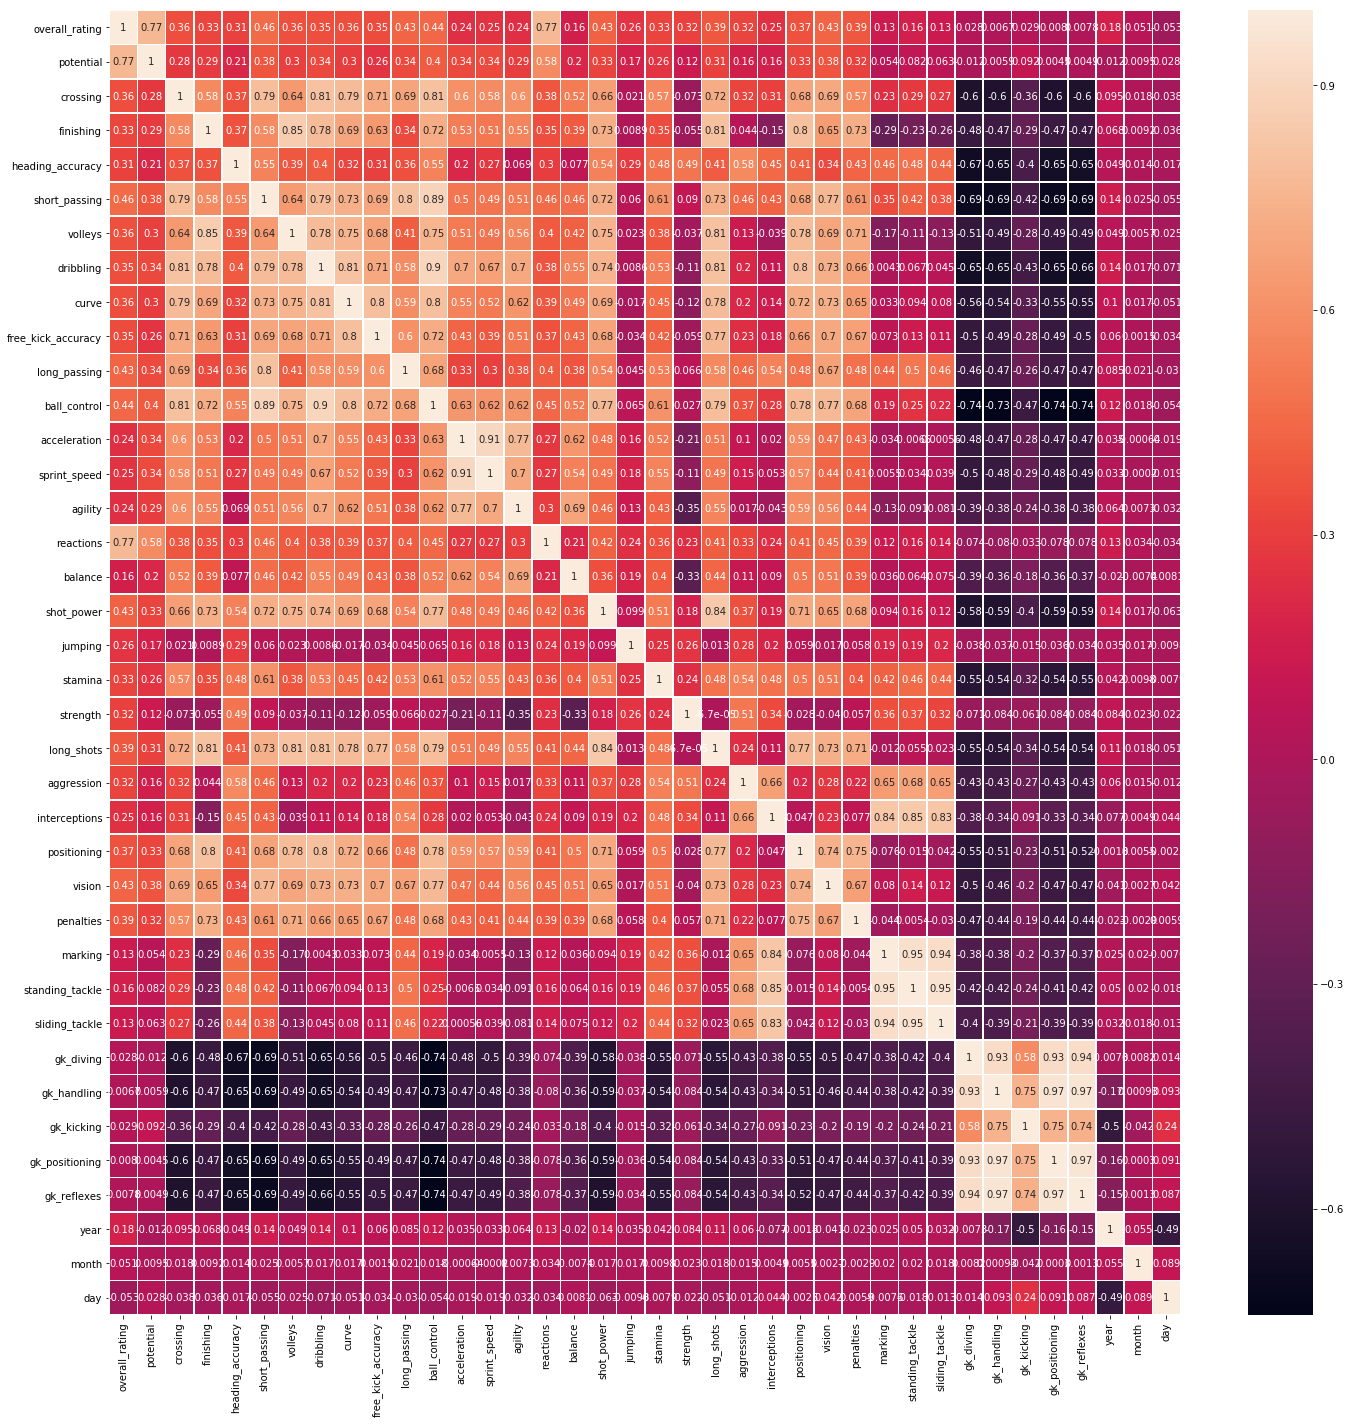

In [524]:
fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=24,h=24)
sns.heatmap(corr2,annot = True,linewidths=0.5,ax = ax2)

In [525]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'overall_rating ~ crossing + finishing + heading_accuracy + short_passing + volleys + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + balance + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle + gk_diving + gk_handling + gk_kicking + gk_positioning + gk_reflexes', data = data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 1.976e+04
Date:                Fri, 27 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:05:16   Log-Likelihood:            -4.6965e+05
No. Observations:              180354   AIC:                         9.394e+05
Df Residuals:                  180320   BIC:                         9.397e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.0062      0.101     59.287      0.000       5.808       6.205
crossing              -0.0107      0.001    -10.996      0.000      -0.013      -0.009
finishing              0.0129      0.001     11.916      0.000       0.011       0.015
heading_accuracy       0.1006      0.001    105.913      0.000       0.099       0.103
short_passing          0.0752      0.002     46.527      0.000       0.072       0.078
volleys               -0.0002      0.001     -0.209      0.834      -0.002       0.002
dribbling             -0.0118      0.001     -8.625      0.000      -0.014      -0.009
curve                  0.0116      0.001     12.294      0.000       0.010       0.013
free_kick_accuracy     0.0095      0.001     11.413      0.000       0.008       0.011
long_passing           0.0171      0.001     15.437      0.000       0.015       0.019
ball_control           0.2315      0.002    127.762      0.000       0.228       0.235
acceleration           0.0416      0.002     25.726      0.000       0.038       0.045
sprint_speed           0.0469      0.002     30.714      0.000       0.044       0.050
agility               -0.0143      0.001    -12.022      0.000      -0.017      -0.012
reactions              0.2800      0.001    226.916      0.000       0.278       0.282
balance                0.0045      0.001      4.851      0.000       0.003       0.006
shot_power             0.0241      0.001     23.358      0.000       0.022       0.026
jumping                0.0123      0.001     14.394      0.000       0.011       0.014
stamina               -0.0176      0.001    -18.449      0.000      -0.019      -0.016
strength               0.0625      0.001     63.413      0.000       0.061       0.064
long_shots            -0.0204      0.001    -18.995      0.000      -0.023      -0.018
aggression             0.0109      0.001     13.538      0.000       0.009       0.012
interceptions          0.0184      0.001     21.267      0.000       0.017       0.020
positioning           -0.0208      0.001    -22.438      0.000      -0.023      -0.019
vision                 0.0079      0.001      7.720      0.000       0.006       0.010
penalties              0.0164      0.001     18.646      0.000       0.015       0.018
marking                0.0334      0.001     25.301      0.000       0.031       0.036
standing_tackle        0.0125      0.002      8.169      0.000       0.009       0.015
sliding_tackle        -0.0284      0.001    -21.909      0.000      -0.031      -0.026
gk_diving              0.2040      0.002    119.265      0.000       0.201       0.207
gk_handling            0.0572      0.002     25.375      0.000       0.053       0.062
gk_kicking            -0.0287      0.001    -39.156      0.000      -0.030      -0.027
gk_positioning         0.0756      0.0

Because of insignificant p-value, let's not consider 'volleys' as a feature. Als because of low correlation coefficients, we can neglect goal-keeping skills and check rsquared value again

In [527]:
lm2 = smf.ols(formula = 'overall_rating ~ crossing + finishing + heading_accuracy + short_passing + dribbling + curve + free_kick_accuracy + long_passing + ball_control + acceleration + sprint_speed + agility + reactions + balance + shot_power + jumping + stamina + strength + long_shots + aggression + interceptions + positioning + vision + penalties + marking + standing_tackle + sliding_tackle', data = data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                 1.303e+04
Date:                Fri, 27 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:10:29   Log-Likelihood:            -5.0998e+05
No. Observations:              180354   AIC:                         1.020e+06
Df Residuals:                  180326   BIC:                         1.020e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.8415      0.111    187.075      0.000      20.623      21.060
crossing              -0.0028      0.001     -2.337      0.019      -0.005      -0.000
finishing             -0.0084      0.001     -6.454      0.000      -0.011      -0.006
heading_accuracy      -0.0293      0.001    -27.413      0.000      -0.031      -0.027
short_passing          0.0058      0.002      2.907      0.004       0.002       0.010
dribbling             -0.0310      0.002    -18.293      0.000      -0.034      -0.028
curve                 -0.0034      0.001     -2.947      0.003      -0.006      -0.001
free_kick_accuracy    -0.0043      0.001     -4.103      0.000      -0.006      -0.002
long_passing           0.0863      0.001     64.010      0.000       0.084       0.089
ball_control           0.0874      0.002     39.894      0.000       0.083       0.092
acceleration           0.0222      0.002     11.025      0.000       0.018       0.026
sprint_speed           0.0226      0.002     11.860      0.000       0.019       0.026
agility               -0.0120      0.001     -8.046      0.000      -0.015      -0.009
reactions              0.4800      0.001    363.579      0.000       0.477       0.483
balance               -0.0171      0.001    -14.940      0.000      -0.019      -0.015
shot_power             0.0188      0.001     14.675      0.000       0.016       0.021
jumping                0.0596      0.001     56.552      0.000       0.057       0.062
stamina               -0.0410      0.001    -34.620      0.000      -0.043      -0.039
strength               0.1112      0.001     91.362      0.000       0.109       0.114
long_shots            -0.0104      0.001     -7.815      0.000      -0.013      -0.008
aggression            -0.0134      0.001    -13.387      0.000      -0.015      -0.011
interceptions          0.0179      0.001     17.313      0.000       0.016       0.020
positioning           -0.0231      0.001    -20.324      0.000      -0.025      -0.021
vision                 0.0192      0.001     15.171      0.000       0.017       0.022
penalties              0.0243      0.001     22.244      0.000       0.022       0.026
marking                0.0139      0.002      8.490      0.000       0.011       0.017
standing_tackle       -0.0034      0.002     -1.802      0.071      -0.007       0.000
sliding_tackle        -0.0530      0.002    -32.854      0.000      -0.056      -0.050
==============================================================================
Omnibus:                     9722.594   Durbin-Watson:                   0.319
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37824.320
Skew:                           0.102   Prob(JB):                         0.00
Kurtosis:                       5.234   Cond. No.                     

There is a significant change in rsquared value so we shall consider the first linear model itself.

## Working with categorical values

In [489]:
cat_cols = data.dtypes[data.dtypes == 'object'].index
cat_cols

Index(['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [490]:
data[cat_cols].nunique()

date                   197
preferred_foot           2
attacking_work_rate      8
defensive_work_rate     18
dtype: int64

In [491]:
data.defensive_work_rate.value_counts()/df.shape[0]

medium    0.711205
high      0.146980
low       0.100186
o         0.007218
1         0.002288
2         0.001815
ormal     0.001723
3         0.001321
5         0.001256
7         0.001125
0         0.001022
6         0.000973
9         0.000777
4         0.000631
es        0.000511
tocky     0.000467
ean       0.000424
8         0.000380
Name: defensive_work_rate, dtype: float64

In [492]:
ls1 = ['_0','o','0','1','2','3','ormal','es','ean','tocky']
ls2 =['4','5','6']
ls3 =['7','8','9']

for i in ls1:
    data.defensive_work_rate.replace({i:'low'},inplace=True)
    for m in ls2:
        data.defensive_work_rate.replace({m:'medium'},inplace=True)
        for h in ls3:
            data.defensive_work_rate.replace({h:'high'},inplace=True)

In [493]:
data.defensive_work_rate.value_counts()/df.shape[0]

medium    0.714064
high      0.149262
low       0.116976
Name: defensive_work_rate, dtype: float64

In [494]:
data.attacking_work_rate.value_counts()/df.shape[0]

medium    0.679810
high      0.232762
low       0.046576
None      0.018029
norm      0.001723
y         0.000511
stoc      0.000467
le        0.000424
Name: attacking_work_rate, dtype: float64

In [495]:
data.attacking_work_rate.replace({'norm':'medium','y':'low','le':'low','stoc':'low','None':'low'},inplace=True)

In [496]:
from scipy.stats import mode
# data.attacking_work_rate.fillna(mode(data.attacking_work_rate.astype(str)).mode[0],inplace=True)

In [497]:
data.attacking_work_rate.value_counts()/df.shape[0]

medium    0.681533
high      0.232762
low       0.066008
Name: attacking_work_rate, dtype: float64

In [498]:
data.preferred_foot.unique()

array(['right', 'left'], dtype=object)

In [499]:
 type(data.date)

pandas.core.series.Series

In [500]:
data['year'] = pd.DatetimeIndex(data.date).year
data['month'] = pd.DatetimeIndex(data.date).month
data['day'] = pd.DatetimeIndex(data.date).day

In [501]:
data.drop('date',axis=1, inplace=True)

In [502]:
cat_cols1 = data.columns[data.dtypes=='object']
cat_cols1

Index(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [503]:
data.head(10)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day
0,1,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,2,18
1,2,218353,505942,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,11,19
2,3,218353,505942,62.0,66.0,right,medium,medium,49.0,44.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,9,21
3,4,218353,505942,61.0,65.0,right,medium,medium,48.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015,3,20
4,5,218353,505942,61.0,65.0,right,medium,medium,48.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007,2,22
5,6,189615,155782,74.0,76.0,left,high,medium,80.0,53.0,...,75.0,78.0,14.0,7.0,9.0,9.0,12.0,2016,4,21
6,7,189615,155782,74.0,76.0,left,high,medium,80.0,53.0,...,75.0,78.0,14.0,7.0,9.0,9.0,12.0,2016,4,7
7,8,189615,155782,73.0,75.0,left,high,medium,79.0,52.0,...,75.0,78.0,14.0,7.0,9.0,9.0,12.0,2016,1,7
8,9,189615,155782,73.0,75.0,left,high,medium,79.0,51.0,...,75.0,78.0,14.0,7.0,9.0,9.0,12.0,2015,12,24
9,10,189615,155782,73.0,75.0,left,high,medium,79.0,51.0,...,75.0,78.0,14.0,7.0,9.0,9.0,12.0,2015,12,17


## Histogram - measuring skewness

In [504]:
data.overall_rating.skew()

-0.2009245959853256

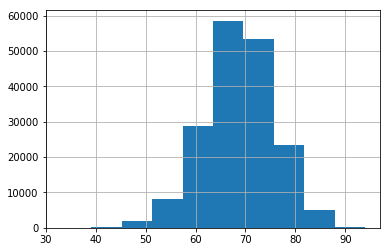

In [505]:
data.overall_rating.hist()

drop columns id, player_fifa_api_id and player_api_id drom independent variable

## Model creation

In [506]:
rel_col=data.drop(['id', 'player_fifa_api_id','player_api_id'], axis=1)

In [507]:
rel_col.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,year,month,day
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016,2,18
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,11,19
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015,9,21
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015,3,20
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007,2,22


In [508]:
rel_col.shape

(180354, 41)

In [509]:
rel_col=pd.get_dummies(rel_col, columns=["preferred_foot","attacking_work_rate", "defensive_work_rate"], prefix=["preferred_foot","attacking_work_rate", "attacking_work_rate"])


In [510]:
rel_col.head(10)

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,month,day,preferred_foot_left,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_high,attacking_work_rate_low,attacking_work_rate_medium
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,2,18,0,1,0,0,1,0,0,1
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,11,19,0,1,0,0,1,0,0,1
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,9,21,0,1,0,0,1,0,0,1
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,3,20,0,1,0,0,1,0,0,1
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,2,22,0,1,0,0,1,0,0,1
5,74.0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,...,4,21,1,0,1,0,0,0,0,1
6,74.0,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,...,4,7,1,0,1,0,0,0,0,1
7,73.0,75.0,79.0,52.0,57.0,70.0,29.0,71.0,68.0,69.0,...,1,7,1,0,1,0,0,0,0,1
8,73.0,75.0,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,...,12,24,1,0,1,0,0,0,0,1
9,73.0,75.0,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,...,12,17,1,0,1,0,0,0,0,1


In [511]:
# Devide data into X and y# Devide  
y = data.overall_rating
X = rel_col.drop('overall_rating',axis=1)



In [544]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [545]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [546]:
predicted_overall_rating = regressor.predict(X_test)

In [547]:
from sklearn.metrics import mean_squared_error
import numpy as np
msr = mean_squared_error(y_test, predicted_overall_rating)
rmsr = np.sqrt(msr)
print('Mean Squared Error = ', msr)
print('Root Mean Squared Error = ', rmsr)
print('The model score is:',pipeline.score(X_test, y_test))

Mean Squared Error =  7.437050969781325
Root Mean Squared Error =  2.7270957023510056
The model score is: 0.8508194647397704


# Decision tree model

In [548]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [549]:
y_prediction = regressor.predict(X_test)
y_prediction

array([63.  , 67.  , 83.  , ..., 72.  , 70.98, 60.  ])

In [550]:
y_test.describe()

count    45089.000000
mean        68.549136
std          7.057454
min         35.000000
25%         64.000000
50%         69.000000
75%         73.000000
max         94.000000
Name: overall_rating, dtype: float64

In [551]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [543]:
print(RMSE)

1.4354232353091363
